<a href="https://colab.research.google.com/github/jsten07/cms_routing/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Uni/StudyProject_CMS/data"

Mounted at /content/drive
2020_AIS.csv  2020_merged.csv


In [68]:
import pandas as pd
# from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from pathlib import Path
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [52]:
year = 2020
df = pd.read_csv("/content/drive/MyDrive/Uni/StudyProject_CMS/data/2020_merged.csv").drop(['Unnamed: 0'], axis=1, errors='ignore')
df= df[['SOG', 'Length', 'Width', 'Draft', 'COG', 'Heading', 'VHM0_WW', 'VMDR_SW2', 'VMDR_SW1','VMDR',  'VTM10', 'VTPK','VPED','VTM02','VMDR_WW','VTM01_SW2','VHM0_SW1','VTM01_SW1','VSDX','VSDY','VHM0','VTM01_WW','VHM0_SW2']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SOG,Length,Width,Draft,COG,Heading,VHM0_WW,VMDR_SW2,VMDR_SW1,VMDR,VTM10,VTPK,VPED,VTM02,VMDR_WW,VTM01_SW2,VHM0_SW1,VTM01_SW1,VSDX,VSDY,VHM0,VTM01_WW,VHM0_SW2
SOG,1.000000,0.220522,0.186987,0.136221,0.085086,-0.105997,-0.052148,0.036125,0.044743,0.059213,0.083307,0.070434,0.047501,0.074939,0.017863,0.059917,0.056029,0.036247,0.002320,-0.023913,0.031747,-0.036251,0.106430
Length,0.220522,1.000000,0.905064,0.784196,-0.002047,-0.020435,0.043497,0.081904,0.112369,0.126469,0.106937,0.093677,0.128467,0.089291,0.130635,0.066435,0.106186,0.106705,0.190406,-0.045141,0.107059,0.029385,0.077288
Width,0.186987,0.905064,1.000000,0.803572,0.013352,-0.035736,0.040487,0.137899,0.163665,0.179236,0.198469,0.179569,0.181167,0.174421,0.126677,0.117845,0.168152,0.181047,0.182926,-0.057991,0.162386,0.021529,0.138281
Draft,0.136221,0.784196,0.803572,1.000000,0.029511,-0.040061,0.053613,0.070628,0.127717,0.128868,0.134227,0.121399,0.122776,0.119763,0.078124,0.082787,0.129363,0.138314,0.141478,-0.045609,0.130892,0.033243,0.103482
COG,0.085086,-0.002047,0.013352,0.029511,1.000000,-0.575176,-0.030011,0.029216,0.050181,0.016503,0.031046,0.037370,0.037007,0.020184,-0.024008,0.025750,-0.001263,0.034836,-0.007367,0.006775,-0.005932,-0.021577,0.029215
Heading,-0.105997,-0.020435,-0.035736,-0.040061,-0.575176,1.000000,-0.005533,0.056766,0.052655,0.059216,0.041983,0.049351,0.044693,0.025958,0.085352,0.019834,0.016358,0.046271,0.081849,-0.018615,0.011403,-0.016821,0.005682
VHM0_WW,-0.052148,0.043497,0.040487,0.053613,-0.030011,-0.005533,1.000000,-0.016612,-0.029967,0.014862,-0.024384,-0.032899,-0.004761,0.052743,0.030028,0.008610,0.265323,0.162085,0.045833,-0.094340,0.638063,0.929878,0.204068
VMDR_SW2,0.036125,0.081904,0.137899,0.070628,0.029216,0.056766,-0.016612,1.000000,0.472225,0.508600,0.399470,0.424405,0.534766,0.347595,0.268495,0.183111,0.236330,0.367005,0.312244,-0.112283,0.227441,-0.055814,0.298262
VMDR_SW1,0.044743,0.112369,0.163665,0.127717,0.050181,0.052655,-0.029967,0.472225,1.000000,0.792466,0.504697,0.490573,0.860906,0.465723,0.326490,0.358508,0.320675,0.407235,0.430392,-0.163299,0.291570,-0.078916,0.328166
VMDR,0.059213,0.126469,0.179236,0.128868,0.016503,0.059216,0.014862,0.508600,0.792466,1.000000,0.441726,0.435706,0.874625,0.402227,0.465576,0.311662,0.285551,0.390838,0.570043,-0.182932,0.276651,-0.030631,0.308304


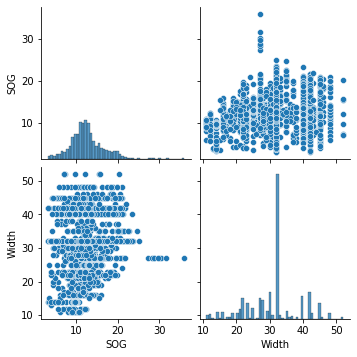

In [53]:
import seaborn as sns
# df = df.loc[(df['Width'] >= 30) & (df['Width'] <= 35)]
sns.pairplot(df[['SOG','Width']])

In [54]:
# prepare dataframe
df = df.copy()
df = df.dropna()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2285
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SOG        2044 non-null   float64
 1   Length     2044 non-null   float64
 2   Width      2044 non-null   float64
 3   Draft      2044 non-null   float64
 4   COG        2044 non-null   float64
 5   Heading    2044 non-null   float64
 6   VHM0_WW    2044 non-null   float64
 7   VMDR_SW2   2044 non-null   float64
 8   VMDR_SW1   2044 non-null   float64
 9   VMDR       2044 non-null   float64
 10  VTM10      2044 non-null   float64
 11  VTPK       2044 non-null   float64
 12  VPED       2044 non-null   float64
 13  VTM02      2044 non-null   float64
 14  VMDR_WW    2044 non-null   float64
 15  VTM01_SW2  2044 non-null   float64
 16  VHM0_SW1   2044 non-null   float64
 17  VTM01_SW1  2044 non-null   float64
 18  VSDX       2044 non-null   float64
 19  VSDY       2044 non-null   float64
 20  VHM0    

,SOG,Length,Width,Draft,COG,Heading,VHM0_WW,VMDR_SW2,VMDR_SW1,VMDR,VTM10,VTPK,VPED,VTM02,VMDR_WW,VTM01_SW2,VHM0_SW1,VTM01_SW1,VSDX,VSDY,VHM0,VTM01_WW,VHM0_SW2
0,15.5,333.0,42.0,14.5,-110.1,302.0,0.000000,292.350006,284.630005,293.290009,11.380000,15.219999,291.630005,7.360000,235.489990,11.820000,0.970000,13.210000,0.030000,-0.010000,1.660000,0.000000,0.700000
1,10.7,189.0,32.0,12.6,-153.4,257.0,0.000000,324.130005,302.119995,305.973328,12.900000,15.723333,292.500000,10.309999,134.796661,6.763333,1.500000,12.903334,0.010000,-0.010000,1.953333,0.000000,1.100000
2,13.4,199.0,35.0,9.0,-141.3,272.0,0.716667,318.426666,319.213348,321.453308,10.653334,15.333334,292.500000,6.596667,3.826665,9.490000,1.546667,9.523334,0.006667,-0.100000,2.343333,3.330000,1.510000
3,12.1,255.0,35.0,9.0,84.0,76.0,0.430000,285.589996,287.399994,276.070007,4.200000,2.960000,285.000000,2.580000,269.899994,12.110000,0.130000,10.300000,0.060000,0.010000,0.490000,2.490000,0.100000
4,11.3,177.0,28.0,10.0,-89.6,324.0,1.070000,322.726654,288.020020,308.596680,10.956667,15.219999,277.500000,5.880000,352.156677,7.623333,1.400000,12.766666,0.016667,-0.113333,2.036667,3.813334,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,12.6,308.0,32.0,9.2,-99.1,310.0,1.690000,175.050018,102.236679,148.470001,5.640000,6.373333,155.660004,4.723333,160.190002,6.466667,0.833333,5.543333,-0.046667,0.136667,1.916667,4.833333,0.140000
2282,8.6,189.0,32.0,12.0,120.6,118.0,0.260000,82.590004,33.240005,46.080002,5.230000,4.720000,37.500000,3.330000,72.040001,13.320000,0.540000,3.690000,-0.040000,-0.030000,0.650000,2.140000,0.190000
2283,11.2,189.0,32.0,12.0,117.7,115.0,0.283333,84.656670,31.796669,45.913338,5.363333,4.886667,35.029999,3.483334,78.440002,12.956667,0.610000,3.830000,-0.043333,-0.026667,0.733333,2.226667,0.213333
2284,12.0,225.0,23.0,9.0,-93.3,311.0,2.186667,253.393356,250.156677,198.393341,5.726666,6.506667,203.580002,4.796667,198.086670,6.513333,0.180000,6.643333,0.040000,0.180000,2.206667,5.203333,0.116667


In [81]:
# Select features and target variable
subset = ["Width", "VHM0", "VMDR_WW", "VTM01_WW"]
# subset = ["Width", "VHM0"]
X = df.iloc[:,1:23].copy()
# X = df[subset].copy()
y = df.iloc[:,0].copy()

In [82]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
y_train
#X_train

469     17.9
119     12.3
368     11.3
452     11.2
1409    11.9
        ... 
707      6.3
1728    12.0
723     13.4
1040    12.9
291      8.5
Name: SOG, Length: 1635, dtype: float64

In [61]:
# Build DT model and finetune
rt = DecisionTreeRegressor(criterion = "mse")#, max_depth=60)
rt

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
# Train DT model
model_r = rt.fit(X_train, y_train)
model_r

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
# TEst dt model
model_r.score(X_train, y_train)

1.0

In [66]:
# Evaluate
y_pred = model_r.predict(X_test)
print("R Squared Score is:", metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared Score is: -0.7092323437622698
Mean Absolute Error: 3.645232273838631
Mean Squared Error: 23.259731051344744
Root Mean Squared Error: 4.822834337953642


In [67]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

VMDR_WW 0.32498960215115674
VTM01_WW 0.2660277277698542
VHM0 0.2522333626544346
Width 0.15674930742455453


In [83]:
# Linear Regression
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
model_lr.score(X_test, y_test)
# metrics.r2_score(y_test, y_pred_lr)

0.06694618069736191

In [87]:
# Extra Tree Regression
et = ExtraTreesRegressor(criterion = "mae", max_depth=40)
et
model_et = et.fit(X_train, y_train)
y_pred_et = model_et.predict(X_test)
model_et.score(X_test, y_test)
# metrics.r2_score(y_test, y_pred_lr)

0.29044854577340673

In [85]:
# Decision Tree Regression
dt = DecisionTreeRegressor()
dt
model_dt = dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

# y_pred_dt = model_dt.predict(X_test)
# metrics.r2_score(y_test, y_pred_lr)

-0.4278666315183328

# Questions
- How to improve model?
  - More data? On similar type of ship or one specific ship?
    - Where to get the data and how to get them faster?
  - How meaningful is R²?

# TODO
- Normalize data!
- Diversion of Heading vs. COG
- Transfer model to grid to use for routing
- (Remove SOG outliers)
- Get larger dataset
  - Filter specific type of ship
- Research on regression / modelling methods

## Open questions
- How to translate model in to grid
  - Based on (more or less) live data?
- How many datasets did they use for the example paper?